In [9]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [10]:
def read_csv(file):
    df = pd.read_csv(file, parse_dates=True, index_col=0)
    return df

## XGBoost for Nature imputed dataset


In [30]:
X_train = read_csv('output/\CompleteDengueNatureTrain_0.csv')
X_test = read_csv('output/\CompleteDengueNatureTest_0.csv')

y = pd.read_csv('input/\dengue_labels_train.csv', parse_dates=True)

y = y.groupby(['year', 'weekofyear']).sum()
y_train = y.iloc[:734]
y_train = pd.DataFrame(index = X_train.index, data = y_train.total_cases.values)
y_test = y.iloc[734:]
y_test = pd.DataFrame(index = X_test.index, data = y_test.total_cases.values)


xgb_model = xgb.XGBClassifier(objective="reg:squarederror",
                                  eval_metric = 'rmse',
                                  max_depth=3,
                                  n_estimators=180,
                                  learning_rate=0.2
                              )
model = xgb_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("\nRMSE: ", np.round(RMSE, 2))


RMSE:  28.6


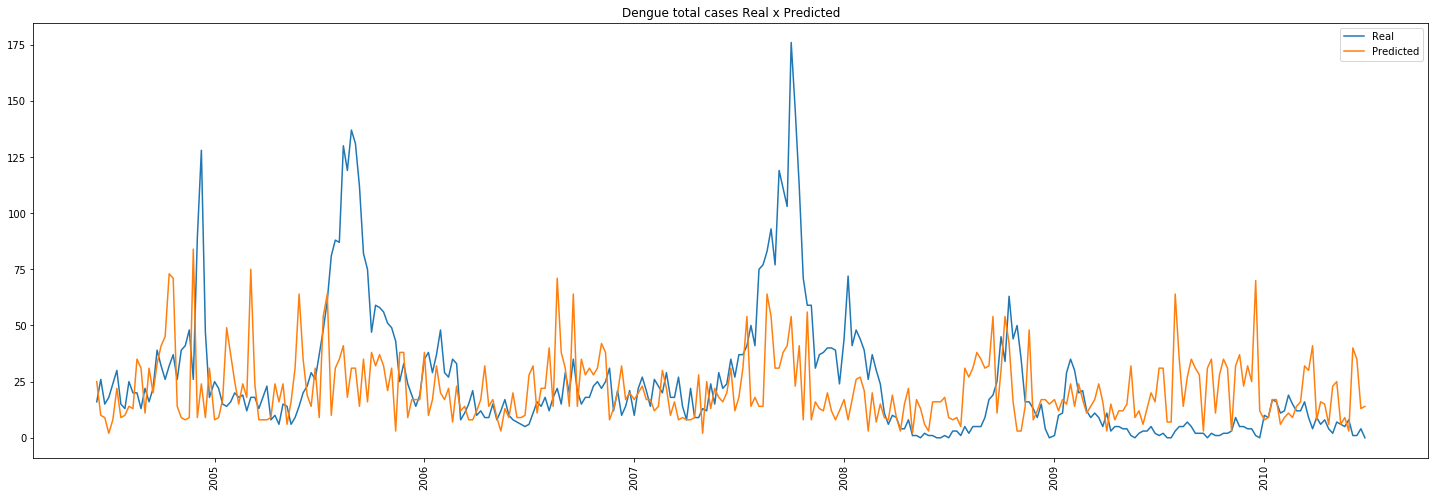

In [35]:
plt.figure(figsize=(25, 8))
plt.plot(y_test.index, y_test.values, label='Real')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Dengue total cases Real x Predicted")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [39]:
def run_experiment_multiple_times(n=30):
    result_dict = {}
    result_dict= {'rmse':0, 'best_model':None, 'best_rmse':999999999999}
    list_rmse = []
    for i in range(0,n):
        y = pd.read_csv('input/\dengue_labels_train.csv', parse_dates=True)
        y = y.groupby(['year', 'weekofyear']).sum()
        X_train = read_csv('output/\CompleteDengueNatureTrain_'+str(i)+'.csv')
        X_test = read_csv('output/\CompleteDengueNatureTest_'+str(i)+'.csv')
        y_train = y.iloc[:734]
        y_train = pd.DataFrame(index = X_train.index, data = y_train.total_cases.values)
        y_test = y.iloc[734:]
        y_test = pd.DataFrame(index = X_test.index, data = y_test.total_cases.values)
        xgb_model = xgb.XGBClassifier(objective="reg:squarederror",
                                      eval_metric = 'rmse',
                                      max_depth=3,
                                      n_estimators=180,
                                      learning_rate=0.2
                                  )
        model = xgb_model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        MSE = mse(y_test, y_pred)
        RMSE = np.sqrt(MSE)
        list_rmse.append(RMSE)
        print('Round', i, "rmse", RMSE)
        result_dict['rmse'] += RMSE
        
        if result_dict['best_rmse'] > RMSE:
            result_dict['best_rmse'] = RMSE
            result_dict['best_model'] = model
    print("STD RMSE", np.std(list_rmse, axis=0))
    result_dict['rmse'] = result_dict['rmse']/n
    return result_dict     

In [ ]:
result_dict = run_experiment_multiple_times(n=30)

Round 0 rmse 28.60425098832645
Round 1 rmse 30.07218827981276
Round 2 rmse 28.60425098832645
Round 3 rmse 28.60425098832645
Round 4 rmse 28.94872313986528
Round 5 rmse 28.60425098832645
Round 6 rmse 28.94872313986528
Round 7 rmse 28.60425098832645
Round 8 rmse 29.53921257185234
Round 9 rmse 29.53921257185234
Round 10 rmse 28.94872313986528
Round 11 rmse 29.53921257185234
Round 12 rmse 29.53921257185234
Round 13 rmse 30.07218827981276
Round 14 rmse 30.07218827981276
Round 15 rmse 30.07218827981276
Round 16 rmse 28.94872313986528
Round 17 rmse 28.94872313986528
Round 18 rmse 28.60425098832645
Round 19 rmse 30.07218827981276
Round 20 rmse 28.94872313986528
Round 21 rmse 28.94872313986528
Round 22 rmse 28.94872313986528
Round 23 rmse 30.07218827981276
Round 24 rmse 30.07218827981276
Round 25 rmse 30.07218827981276
Round 26 rmse 28.60425098832645
Round 27 rmse 29.53921257185234
Round 28 rmse 28.60425098832645


In [ ]:
result_dict